In [1]:
import pickle
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
chiller_df = pd.read_pickle('./data/chiller_hourly_processed.pkl')
chiller_df = chiller_df.reset_index(drop=True)

In [3]:
seasons = {
    'Spring 2020': (pd.to_datetime('2020-01-3'), pd.to_datetime('2020-05-09')),
    'Summer 2020': (pd.to_datetime('2020-05-10'), pd.to_datetime('2020-08-16')),
    'Fall 2020': (pd.to_datetime('2020-08-17'), pd.to_datetime('2020-12-12')),
    'Winter 2020': (pd.to_datetime('2020-12-13'), pd.to_datetime('2021-01-24')),
    'Spring 2021': (pd.to_datetime('2021-01-25'), pd.to_datetime('2021-05-10')),
    'Summer 2021': (pd.to_datetime('2021-05-11'), pd.to_datetime('2021-08-19')),
    'Fall 2021': (pd.to_datetime('2021-08-20'), pd.to_datetime('2021-12-18')),
    'Winter 2021': (pd.to_datetime('2021-12-19'), pd.to_datetime('2022-01-14')),
    'Spring 2022': (pd.to_datetime('2022-01-15'), pd.to_datetime('2022-05-09')),
    'Summer 2022': (pd.to_datetime('2022-05-10'), pd.to_datetime('2022-08-18')),
    'Fall 2022': (pd.to_datetime('2022-08-19'), pd.to_datetime('2022-12-17')),
    'Winter 2022': (pd.to_datetime('2022-12-18'), pd.to_datetime('2023-01-05')),
    'Spring 2023': (pd.to_datetime('2023-01-06'), pd.to_datetime('2023-05-04')),
    'Summer 2023': (pd.to_datetime('2023-05-05'), pd.to_datetime('2023-06-06'))
}


for season, time_range in seasons.items():
    mask = (chiller_df['time'] >= time_range[0]) & (chiller_df['time'] <= time_range[1])
    subset_df = chiller_df.loc[mask]
    globals()["df_" + season.lower().replace(" ", "_")] = subset_df

In [4]:
from scipy import stats

df_fall_2020['time'] = pd.to_datetime(df_fall_2020['time'])

# Group by the hour of the 'time' column and remove outliers within each hour
df_clean = df_fall_2020.drop(['time'], axis=1).copy()
hours_grouped = df_fall_2020['time'].dt.hour

for column in df_clean.columns:
    for hour in range(24):
        # Select data for the current hour and the current column
        non_zero_values = df_clean[column][(hours_grouped == hour) & (df_clean[column] != 0)]
        
        # Calculate z-scores for the current hour and the current column
        z_scores = np.abs(stats.zscore(non_zero_values))
        
        # Identify outliers for the current hour and the current column
        outliers = non_zero_values[(z_scores > 3)]
        
        # Set outliers to NaN for the current hour and the current column
        df_clean.loc[(hours_grouped == hour) & (df_clean[column] != 0) & df_clean[column].isin(outliers), column] = np.nan

# Remove rows with np.nan values
df_clean = df_clean.dropna()
df_train_fall_2020 = df_clean.copy()
df_train_fall_2020

C:\Users\rheah\AppData\Local\Temp\ipykernel_5884\2771911208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fall_2020['time'] = pd.to_datetime(df_fall_2020['time'])


,ESB Chiller Plant plantEfficiency,ESB_Chillers Demand,ESB_Chillers percentRefrigerationLoad,ESB_Chillers tonnage,Active_Chiller_Load_Percent Value,Primary_CHW_Flow Value,Building_Load Value,ESB_Chillers chillerEvapDifferentialPress,ESB_Chillers chillerCondDifferentialPress,ESB_Chillers chillerCondLeavingWaterTemp,ESB_Chillers chillerEvapEnteringWaterTemp,ESB_Chillers outdoorAirTemp,ESB_Chillers chillerEvapLeavingWaterTemp,ESB_Chillers chillerTotalKw,ESB_Chillers chillerCondEnteringWaterTemp,ESB_Chillers chillerEvapWaterFlow
3614,0.5639,146.09,44.82,358.55,0.00,1822.47,0.00,5.2174,4.8286,77.40,47.42,72.94,42.45,154.39,73.54,1729.30
3615,0.5705,144.34,43.89,351.10,0.00,1832.59,0.00,5.2336,4.8594,77.22,47.15,72.18,42.28,153.68,73.57,1729.49
3616,0.5635,141.17,43.74,349.92,0.00,1843.00,0.00,5.2165,4.8503,77.00,47.13,71.33,42.28,147.89,73.29,1731.77
3617,0.5602,138.92,43.51,348.04,0.00,1831.37,0.00,5.2261,4.8676,76.60,47.10,70.28,42.28,144.02,73.05,1730.13
3618,0.5642,134.29,42.17,337.34,0.00,1799.20,0.00,5.2286,4.8711,76.05,46.96,69.68,42.28,140.97,72.64,1730.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6418,0.5070,54.38,23.04,184.31,24.52,1817.69,291.69,5.1988,0.5605,61.23,44.50,60.09,41.93,59.80,57.71,1723.81
6419,0.5300,53.23,21.79,174.32,24.38,1817.91,295.17,5.1921,0.4446,61.15,44.31,60.02,41.88,59.01,57.44,1721.30
6420,0.5242,53.69,22.22,177.79,24.14,1817.72,298.21,5.1828,0.4626,61.05,44.33,59.49,41.86,57.49,57.32,1722.44
6421,0.5393,54.06,21.62,172.92,20.16,1821.58,261.70,5.1894,0.7068,61.26,44.32,58.21,41.91,57.15,57.94,1722.57


In [5]:
df_train_fall_2020['hour'] = df_fall_2020['time'].dt.hour

In [24]:
df_train_fall_2020

,ESB Chiller Plant plantEfficiency,ESB_Chillers Demand,ESB_Chillers percentRefrigerationLoad,ESB_Chillers tonnage,Active_Chiller_Load_Percent Value,Primary_CHW_Flow Value,Building_Load Value,ESB_Chillers chillerEvapDifferentialPress,ESB_Chillers chillerCondDifferentialPress,ESB_Chillers chillerCondLeavingWaterTemp,ESB_Chillers chillerEvapEnteringWaterTemp,ESB_Chillers outdoorAirTemp,ESB_Chillers chillerEvapLeavingWaterTemp,ESB_Chillers chillerTotalKw,ESB_Chillers chillerCondEnteringWaterTemp,ESB_Chillers chillerEvapWaterFlow,hour
3614,0.5639,146.09,44.82,358.55,0.00,1822.47,0.00,5.2174,4.8286,77.40,47.42,72.94,42.45,154.39,73.54,1729.30,0
3615,0.5705,144.34,43.89,351.10,0.00,1832.59,0.00,5.2336,4.8594,77.22,47.15,72.18,42.28,153.68,73.57,1729.49,1
3616,0.5635,141.17,43.74,349.92,0.00,1843.00,0.00,5.2165,4.8503,77.00,47.13,71.33,42.28,147.89,73.29,1731.77,2
3617,0.5602,138.92,43.51,348.04,0.00,1831.37,0.00,5.2261,4.8676,76.60,47.10,70.28,42.28,144.02,73.05,1730.13,3
3618,0.5642,134.29,42.17,337.34,0.00,1799.20,0.00,5.2286,4.8711,76.05,46.96,69.68,42.28,140.97,72.64,1730.33,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6418,0.5070,54.38,23.04,184.31,24.52,1817.69,291.69,5.1988,0.5605,61.23,44.50,60.09,41.93,59.80,57.71,1723.81,20
6419,0.5300,53.23,21.79,174.32,24.38,1817.91,295.17,5.1921,0.4446,61.15,44.31,60.02,41.88,59.01,57.44,1721.30,21
6420,0.5242,53.69,22.22,177.79,24.14,1817.72,298.21,5.1828,0.4626,61.05,44.33,59.49,41.86,57.49,57.32,1722.44,22
6421,0.5393,54.06,21.62,172.92,20.16,1821.58,261.70,5.1894,0.7068,61.26,44.32,58.21,41.91,57.15,57.94,1722.57,23


In [6]:
df_test_fall_2021 = df_fall_2021.copy()
df_test_fall_2021['hour'] = df_fall_2021['time'].dt.hour
df_test_fall_2021.drop(['time'], axis=1, inplace=True)
df_test_fall_2021

,ESB Chiller Plant plantEfficiency,ESB_Chillers Demand,ESB_Chillers percentRefrigerationLoad,ESB_Chillers tonnage,Active_Chiller_Load_Percent Value,Primary_CHW_Flow Value,Building_Load Value,ESB_Chillers chillerEvapDifferentialPress,ESB_Chillers chillerCondDifferentialPress,ESB_Chillers chillerCondLeavingWaterTemp,ESB_Chillers chillerEvapEnteringWaterTemp,ESB_Chillers outdoorAirTemp,ESB_Chillers chillerEvapLeavingWaterTemp,ESB_Chillers chillerTotalKw,ESB_Chillers chillerCondEnteringWaterTemp,ESB_Chillers chillerEvapWaterFlow,hour
12445,0.6908,197.33,45.97,367.78,46.11,1817.25,486.95,5.0507,10.8600,83.59,47.14,76.69,42.13,204.1,76.05,1761.91,0
12446,0.6764,192.11,45.98,367.87,46.00,1804.59,486.30,5.0589,10.3700,82.99,47.14,76.04,42.13,196.8,75.42,1762.32,1
12447,0.6647,187.26,45.89,367.15,43.60,1820.39,468.20,5.0593,10.1300,82.49,47.14,75.52,42.13,190.1,75.02,1758.88,2
12448,0.6483,180.86,45.84,366.76,43.88,1820.37,472.06,5.0545,9.9661,81.94,47.14,75.22,42.13,187.5,74.48,1757.00,3
12449,0.6510,181.27,45.73,365.84,44.58,1820.24,470.92,5.0547,9.9630,81.77,47.11,74.91,42.13,187.6,74.33,1761.35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15321,0.5630,92.98,32.95,263.56,31.95,1796.37,369.99,5.2425,-0.8328,67.40,45.65,63.12,41.98,95.7,66.53,1721.85,20
15322,0.5624,85.28,31.46,251.67,33.67,1817.41,368.50,5.2421,-0.5623,66.26,45.40,62.59,41.89,93.4,65.68,1723.29,21
15323,0.5936,80.73,28.61,228.91,28.74,1807.72,318.55,5.2492,-0.4515,65.45,45.18,61.66,41.98,84.5,65.08,1718.65,22
15324,0.5901,79.45,28.50,227.99,29.97,1821.16,351.27,5.2379,-0.5108,65.13,45.20,61.70,42.01,83.2,64.78,1719.62,23


scale by hour 0

In [7]:
feature_list = ['ESB Chiller Plant plantEfficiency', 'ESB_Chillers Demand',
                'ESB_Chillers percentRefrigerationLoad', 'ESB_Chillers tonnage',
                'Active_Chiller_Load_Percent Value', 'Primary_CHW_Flow Value',
                'Building_Load Value', 'ESB_Chillers chillerEvapDifferentialPress',
                'ESB_Chillers chillerCondDifferentialPress',
                'ESB_Chillers chillerCondLeavingWaterTemp',
                'ESB_Chillers chillerEvapEnteringWaterTemp',
                'ESB_Chillers outdoorAirTemp',
                'ESB_Chillers chillerEvapLeavingWaterTemp',
                'ESB_Chillers chillerTotalKw',
                'ESB_Chillers chillerCondEnteringWaterTemp',
                'ESB_Chillers chillerEvapWaterFlow', 'hour']

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Filter out data from hour 0
hour_0_data = df_train_fall_2020[df_train_fall_2020['hour'] == 0]

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler only to the data of hour 0 (excluding the specified columns and 'hour')
scaler.fit(df_train_fall_2020[feature_list])

# Transform the entire dataset using the scaler fitted on hour 0 data
scaled_df_fall_2020 = scaler.transform(df_train_fall_2020[feature_list])
scaled_df_fall_2020 = pd.DataFrame(scaled_df_fall_2020, columns=feature_list)
scaled_df_fall_2020

,ESB Chiller Plant plantEfficiency,ESB_Chillers Demand,ESB_Chillers percentRefrigerationLoad,ESB_Chillers tonnage,Active_Chiller_Load_Percent Value,Primary_CHW_Flow Value,Building_Load Value,ESB_Chillers chillerEvapDifferentialPress,ESB_Chillers chillerCondDifferentialPress,ESB_Chillers chillerCondLeavingWaterTemp,ESB_Chillers chillerEvapEnteringWaterTemp,ESB_Chillers outdoorAirTemp,ESB_Chillers chillerEvapLeavingWaterTemp,ESB_Chillers chillerTotalKw,ESB_Chillers chillerCondEnteringWaterTemp,ESB_Chillers chillerEvapWaterFlow,hour
0,0.141764,0.439730,0.580772,0.580733,0.000000,0.490394,0.000000,0.003267,0.298207,0.562096,0.627907,0.679395,0.218919,0.409729,0.603203,0.313308,0.000000
1,0.147634,0.432745,0.565953,0.565895,0.000000,0.599013,0.000000,0.003988,0.299688,0.556274,0.590971,0.667550,0.172973,0.407199,0.604270,0.316767,0.043478
2,0.141409,0.420093,0.563563,0.563544,0.000000,0.710744,0.000000,0.003227,0.299251,0.549159,0.588235,0.654302,0.172973,0.386565,0.594306,0.358274,0.086957
3,0.138474,0.411112,0.559898,0.559800,0.000000,0.585918,0.000000,0.003654,0.300083,0.536223,0.584131,0.637936,0.172973,0.372773,0.585765,0.328418,0.130435
4,0.142031,0.392632,0.538546,0.538489,0.000000,0.240635,0.000000,0.003766,0.300251,0.518435,0.564979,0.628585,0.172973,0.361903,0.571174,0.332059,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,0.091160,0.073681,0.233726,0.233703,0.340792,0.439090,0.419946,0.002439,0.092927,0.039133,0.228454,0.479115,0.078378,0.072630,0.039858,0.213362,0.869565
2680,0.111615,0.069091,0.213808,0.213806,0.338846,0.441451,0.424956,0.002141,0.087353,0.036546,0.202462,0.478024,0.064865,0.069815,0.030249,0.167668,0.913043
2681,0.106457,0.070927,0.220660,0.220717,0.335511,0.439412,0.429332,0.001727,0.088218,0.033312,0.205198,0.469763,0.059459,0.064398,0.025979,0.188422,0.956522
2682,0.119886,0.072404,0.211099,0.211018,0.280195,0.480841,0.376769,0.002021,0.099963,0.040103,0.203830,0.449813,0.072973,0.063186,0.048043,0.190788,1.000000


In [9]:
scaled_df_fall_2021 = scaler.transform(df_test_fall_2021[feature_list])
scaled_df_fall_2021 = pd.DataFrame(scaled_df_fall_2021, columns=feature_list)
scaled_df_fall_2021

,ESB Chiller Plant plantEfficiency,ESB_Chillers Demand,ESB_Chillers percentRefrigerationLoad,ESB_Chillers tonnage,Active_Chiller_Load_Percent Value,Primary_CHW_Flow Value,Building_Load Value,ESB_Chillers chillerEvapDifferentialPress,ESB_Chillers chillerCondDifferentialPress,ESB_Chillers chillerCondLeavingWaterTemp,ESB_Chillers chillerEvapEnteringWaterTemp,ESB_Chillers outdoorAirTemp,ESB_Chillers chillerEvapLeavingWaterTemp,ESB_Chillers chillerTotalKw,ESB_Chillers chillerCondEnteringWaterTemp,ESB_Chillers chillerEvapWaterFlow,hour
0,0.254625,0.644248,0.599096,0.599116,0.640862,0.434367,0.701061,-0.004153,0.588295,0.762290,0.589603,0.737843,0.132432,0.586885,0.692527,0.906973,0.000000
1,0.241818,0.623413,0.599256,0.599295,0.639333,0.298487,0.700125,-0.003788,0.564728,0.742885,0.589603,0.727712,0.132432,0.560870,0.670107,0.914437,0.043478
2,0.231412,0.604055,0.597821,0.597861,0.605976,0.468069,0.674067,-0.003770,0.553185,0.726714,0.589603,0.719607,0.132432,0.536992,0.655872,0.851811,0.086957
3,0.216827,0.578510,0.597025,0.597084,0.609868,0.467854,0.679624,-0.003984,0.545302,0.708926,0.589603,0.714931,0.132432,0.527726,0.636655,0.817586,0.130435
4,0.219228,0.580147,0.595272,0.595252,0.619597,0.466459,0.677983,-0.003975,0.545153,0.703428,0.585499,0.710100,0.132432,0.528083,0.631317,0.896778,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,0.140964,0.227748,0.391633,0.391543,0.444058,0.210261,0.532674,0.004384,0.025914,0.238680,0.385773,0.526340,0.091892,0.200570,0.353737,0.177681,0.869565
2877,0.140430,0.197014,0.367891,0.367862,0.467964,0.436085,0.530529,0.004367,0.038924,0.201811,0.351573,0.518080,0.067568,0.192373,0.323488,0.203896,0.913043
2878,0.168179,0.178854,0.322479,0.322532,0.399444,0.332081,0.458616,0.004683,0.044253,0.175614,0.321477,0.503585,0.091892,0.160656,0.302135,0.119425,0.956522
2879,0.165066,0.173745,0.320726,0.320699,0.416539,0.476334,0.505723,0.004180,0.041401,0.165265,0.324213,0.504208,0.100000,0.156023,0.291459,0.137084,1.000000


create autoencoder and train on 2020

In [10]:
scaled_df_fall_2020 = scaled_df_fall_2020.dropna()
scaled_df_fall_2021 = scaled_df_fall_2021.dropna()

In [11]:
X_train = scaled_df_fall_2020.values   
X_test = scaled_df_fall_2021.values 

In [12]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
import numpy as np

def create_autoencoder(hidden_units, input_shape):
    input_layer = Input(shape=(input_shape,))
    encoded = Dense(hidden_units, activation='relu')(input_layer)
    decoded = Dense(input_shape, activation='sigmoid')(encoded)
    
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer=Adam(), loss='mae')
    
    return autoencoder

hidden_units = [8, 16, 32]
best_autoencoder = None
best_loss = float('inf')

In [13]:
input_shape = X_train.shape[1]  # Get the number of features/columns in the training data

for units in hidden_units:
    autoencoder = create_autoencoder(units, input_shape)
    
    history = autoencoder.fit(
        X_train, X_train,
        epochs=100,
        batch_size=24,
        shuffle=True,
        validation_data=(X_test, X_test),
        verbose=1 
    )
    
    val_loss = np.min(history.history['val_loss'])
    if val_loss < best_loss:
        best_loss = val_loss
        best_autoencoder = autoencoder

print("Best validation loss: ", best_loss)

Epoch 1/100
112/112 [==============================] - 1s 5ms/step - loss: 0.2192 - val_loss: 0.2234
Epoch 2/100
112/112 [==============================] - 0s 4ms/step - loss: 0.1678 - val_loss: 0.1851
Epoch 3/100
112/112 [==============================] - 0s 3ms/step - loss: 0.1320 - val_loss: 0.1535
Epoch 4/100
112/112 [==============================] - 0s 3ms/step - loss: 0.1101 - val_loss: 0.1331
Epoch 5/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0939 - val_loss: 0.1188
Epoch 6/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0816 - val_loss: 0.1104
Epoch 7/100
112/112 [==============================] - 0s 3ms/step - loss: 0.0719 - val_loss: 0.1045
Epoch 8/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0655 - val_loss: 0.1007
Epoch 9/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0617 - val_loss: 0.0983
Epoch 10/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0589 - val_lo

84/84 [==============================] - 0s 2ms/step


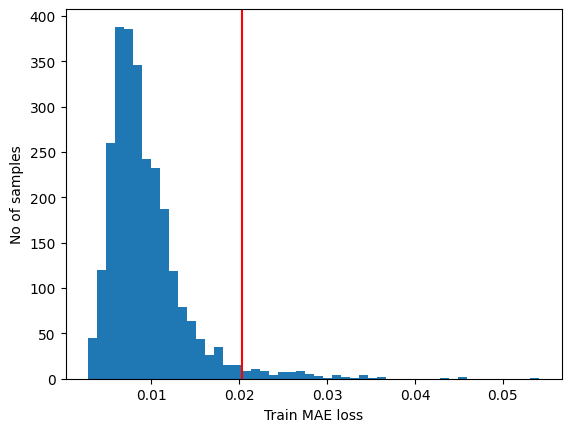

Reconstruction error threshold:  0.02034397932058634


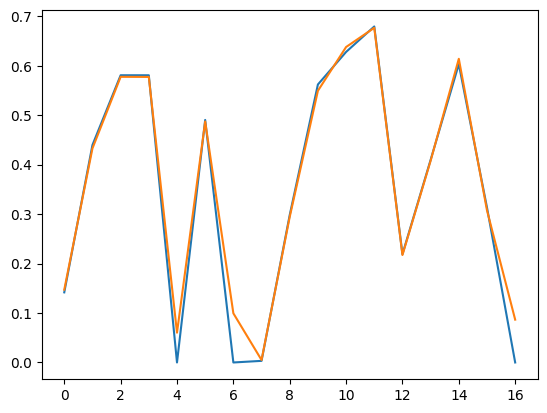

87/87 [==============================] - 0s 1ms/step


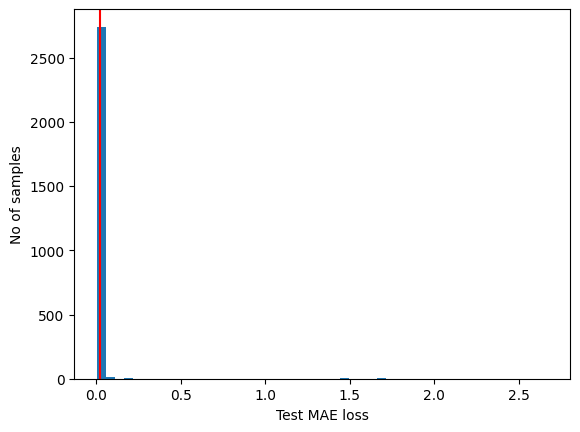

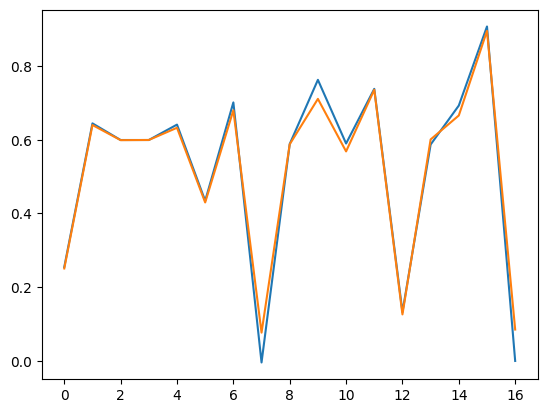

Number of anomaly samples:  1392
Original indices of anomaly samples: [13, 14, 15, 16, 17, 18, 21, 39, 51, 52, 53, 54, 55, 56, 57, 58, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 82, 84, 85, 86, 87, 88, 89, 90, 93, 94, 96, 106, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 144, 145, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 167, 177, 178, 179, 181, 182, 183, 184, 185, 186, 189, 190, 191, 192, 204, 205, 206, 207, 211, 213, 216, 226, 227, 228, 229, 230, 231, 232, 233, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 309, 310, 311, 312, 313, 314, 315, 320, 321, 333, 334, 335, 336, 337, 338, 344, 345, 346, 347, 348, 349, 350, 355, 383, 384, 420, 431, 433, 434, 435, 436, 437, 440, 444, 453, 454, 455, 45

In [16]:
import matplotlib.pyplot as plt

X_train_pred = best_autoencoder.predict(X_train)

train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

threshold = np.percentile(train_mae_loss, 97)


plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.axvline(x=threshold, color='red')
plt.show()

print("Reconstruction error threshold: ", threshold)

# Checking how the first sequence is learnt
plt.plot(X_train[0])
plt.plot(X_train_pred[0])
plt.show()

# Prepare test data
X_test_pred = best_autoencoder.predict(X_test)

test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel("Test MAE loss")
plt.ylabel("No of samples")
plt.axvline(x=threshold, color='red')
plt.show()

plt.plot(X_test[0])
plt.plot(X_test_pred[0])
plt.show()

test_indices = range(len(X_test))
anomalies = (test_mae_loss > threshold).tolist()
anomalies_indices = [index for index, is_anomaly in zip(test_indices, anomalies) if is_anomaly]

print("Number of anomaly samples: ", np.sum(anomalies))
print("Original indices of anomaly samples:", anomalies_indices)